# Random forest cross-validation

Run cross validation by station (leave-one out)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneGroupOut

In [2]:
dat = pd.read_csv("./rbfs/phi_short_reduce.csv")
dat.head()
#X = np.load("./rbfs/phi_reduce.npy")
#y = np.load("./rbfs/y.npy")

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,210,211,212,213,214,215,216,y,site,date
0,0,1.000000,0.933712,0.760067,0.539408,0.333740,0.180022,0.084658,0.034709,0.012406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,2005,2023-01-08
1,1,0.999728,0.941552,0.773095,0.553410,0.345372,0.187912,0.089135,0.036861,0.013290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032,2005,2023-01-08
2,2,0.998914,0.948942,0.785919,0.567468,0.357216,0.196041,0.093797,0.039125,0.014228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030,2005,2023-01-08
3,3,0.997558,0.955871,0.798521,0.581567,0.369266,0.204411,0.098650,0.041506,0.015225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,2005,2023-01-08
4,4,0.995663,0.962327,0.810885,0.595692,0.381514,0.213022,0.103697,0.044008,0.016283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,2005,2023-01-08


In [3]:
dat2 = dat[dat['date'] == "2023-01-01"]
dat2.shape

(0, 221)

In [4]:
dat2 = dat2.groupby('site')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


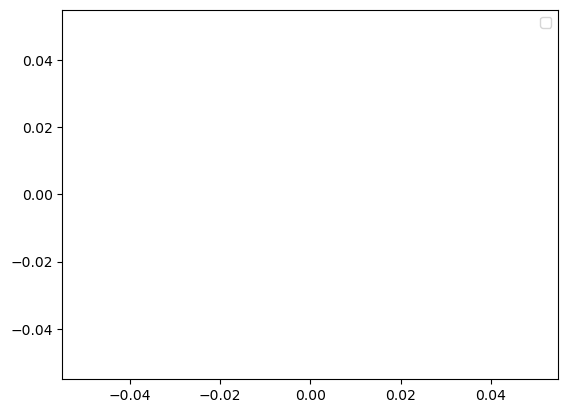

In [5]:
# Plot
fig, ax = plt.subplots()

ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in dat2:
    ax.plot(group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [6]:
X = dat.iloc[:, 1:218]
y = dat['y']
groups = dat['site']
logo = LeaveOneGroupOut()
logo.get_n_splits(X, y, groups)

8

In [7]:
mygrps = groups.unique()
n_grps = len(mygrps)

## Cross-validation loop

In [8]:
my_mae = np.empty(n_grps)
my_y_true = []
my_y_pred = []

In [9]:
for i, (train_index, test_index) in enumerate(logo.split(X, y, groups)):
    print(f"Fold {i}:")
    print(f"Site {mygrps[i]}:")
    #print(f"  Train: index={train_index}, group={groups[train_index]}")
    #print(f"  Test:  index={test_index}, group={groups[test_index]}")

    # Split out data
    X_train = X.iloc[train_index, :]
    print(X_train.shape)
    y_train = y[train_index]
    n_feat = X_train.shape[1]
    
    X_test = X.iloc[test_index, :]
    print(X_test.shape)
    y_test = y[test_index]

    # Build model
    aq_rf = ensemble.RandomForestRegressor()

    # Train model
    aq_rf.fit(X_train, y_train)
    
    ## Predict for test set
    y_test_pred = aq_rf.predict(X_test)
    my_mae[i] = mean_absolute_error(y_test, y_test_pred)
    print(f"MAE: {my_mae[i]}")
    
    my_y_true.append(y_test.to_numpy())
    my_y_pred.append(y_test_pred)


Fold 0:
Site 2005:
(1002, 217)
(142, 217)
MAE: 0.005640352112676053
Fold 1:
Site 3006:
(1001, 217)
(143, 217)
MAE: 0.005360349650349655
Fold 2:
Site 3010:
(1001, 217)
(143, 217)
MAE: 0.0033925874125874077
Fold 3:
Site 3013:
(1000, 217)
(144, 217)
MAE: 0.011413055555555563
Fold 4:
Site 3014:
(1000, 217)
(144, 217)
MAE: 0.005557291666666673
Fold 5:
Site 3015:
(1000, 217)
(144, 217)
MAE: 0.0032718055555555625
Fold 6:
Site 3016:
(1003, 217)
(141, 217)
MAE: 0.005016808510638297
Fold 7:
Site 4002:
(1001, 217)
(143, 217)
MAE: 0.004678811188811183


In [10]:
print(my_mae)
print(np.mean(my_mae))

[0.00564035 0.00536035 0.00339259 0.01141306 0.00555729 0.00327181
 0.00501681 0.00467881]
0.005541382706605049


In [11]:
my_y_pred

[array([0.02888, 0.03019, 0.0316 , 0.03209, 0.03151, 0.03429, 0.0343 ,
        0.035  , 0.03558, 0.03623, 0.03572, 0.03578, 0.03493, 0.03513,
        0.03622, 0.03625, 0.03624, 0.03436, 0.0328 , 0.02974, 0.01954,
        0.01783, 0.01435, 0.01182, 0.01064, 0.01166, 0.01203, 0.01571,
        0.01915, 0.02073, 0.01917, 0.02205, 0.02633, 0.02866, 0.03093,
        0.03195, 0.03346, 0.0342 , 0.03354, 0.03241, 0.03255, 0.03231,
        0.03179, 0.03181, 0.03192, 0.03157, 0.03099, 0.0309 , 0.03035,
        0.03101, 0.03091, 0.03037, 0.03057, 0.02979, 0.02838, 0.02617,
        0.02147, 0.02126, 0.02313, 0.02917, 0.02918, 0.02783, 0.02761,
        0.02917, 0.03018, 0.03054, 0.03438, 0.03284, 0.029  , 0.02366,
        0.02216, 0.01938, 0.02231, 0.02435, 0.02126, 0.02255, 0.02919,
        0.02804, 0.02331, 0.0211 , 0.02096, 0.02436, 0.03079, 0.03109,
        0.03248, 0.03439, 0.03255, 0.02887, 0.02354, 0.0196 , 0.01726,
        0.01805, 0.01664, 0.01699, 0.01792, 0.01863, 0.02225, 0.02386,
      

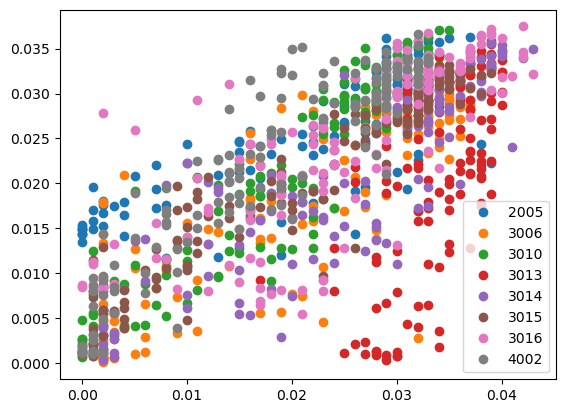

In [12]:
plt.figure()
for i in range(len(mygrps)):
    plt.plot(my_y_true[i], my_y_pred[i], 'o', label = mygrps[i])

plt.legend()
plt.show()

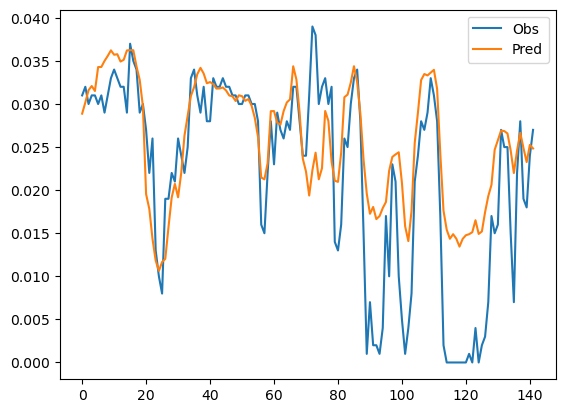

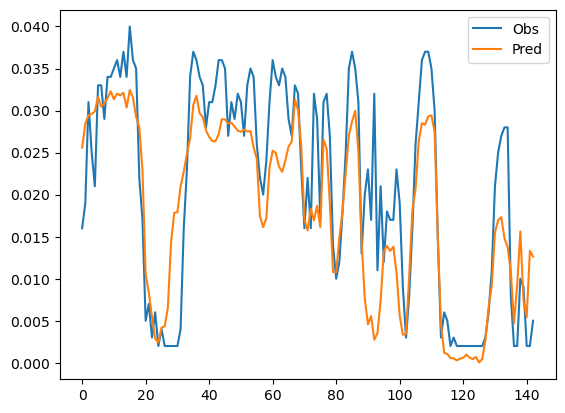

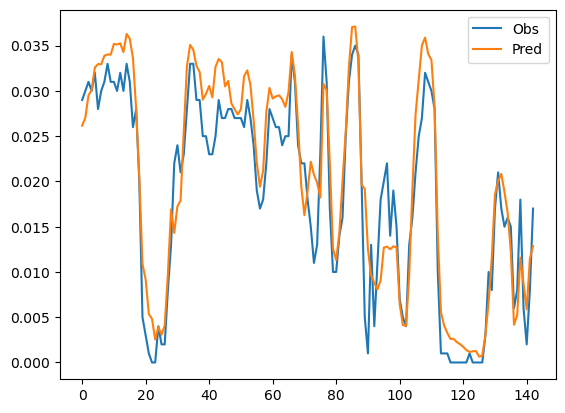

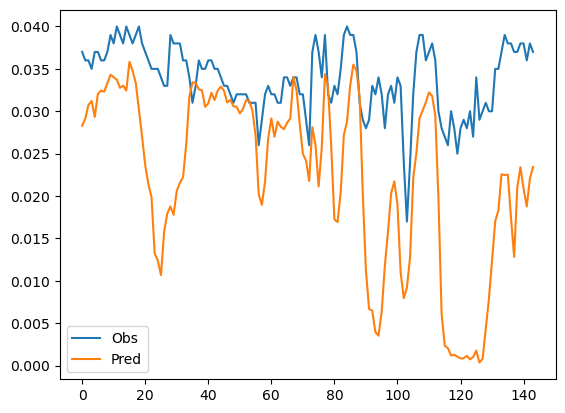

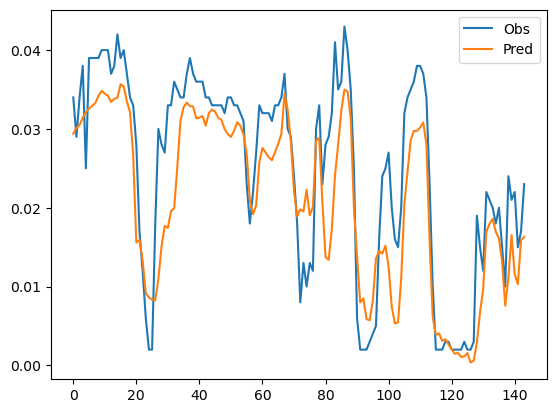

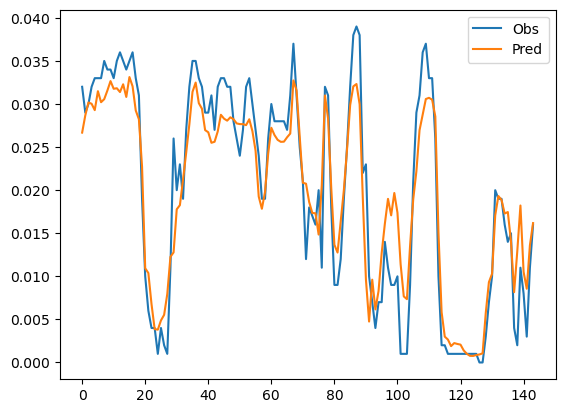

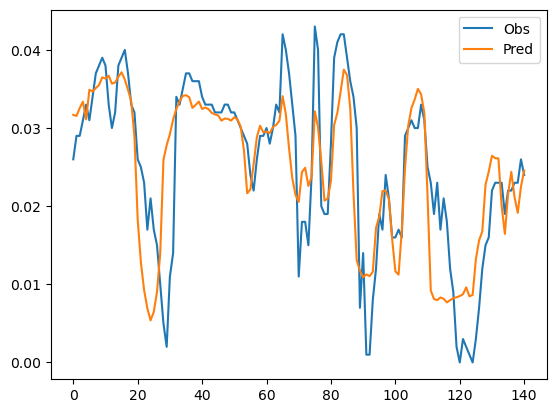

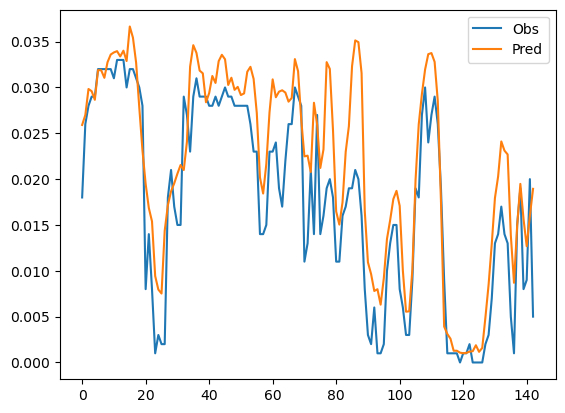

In [13]:
for i in range(len(mygrps)):
    plt.plot(my_y_true[i], label = "Obs")
    plt.plot(my_y_pred[i], label = "Pred")
    plt.legend()
    plt.show()